In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [45]:
data = pd.read_csv("data1.csv")

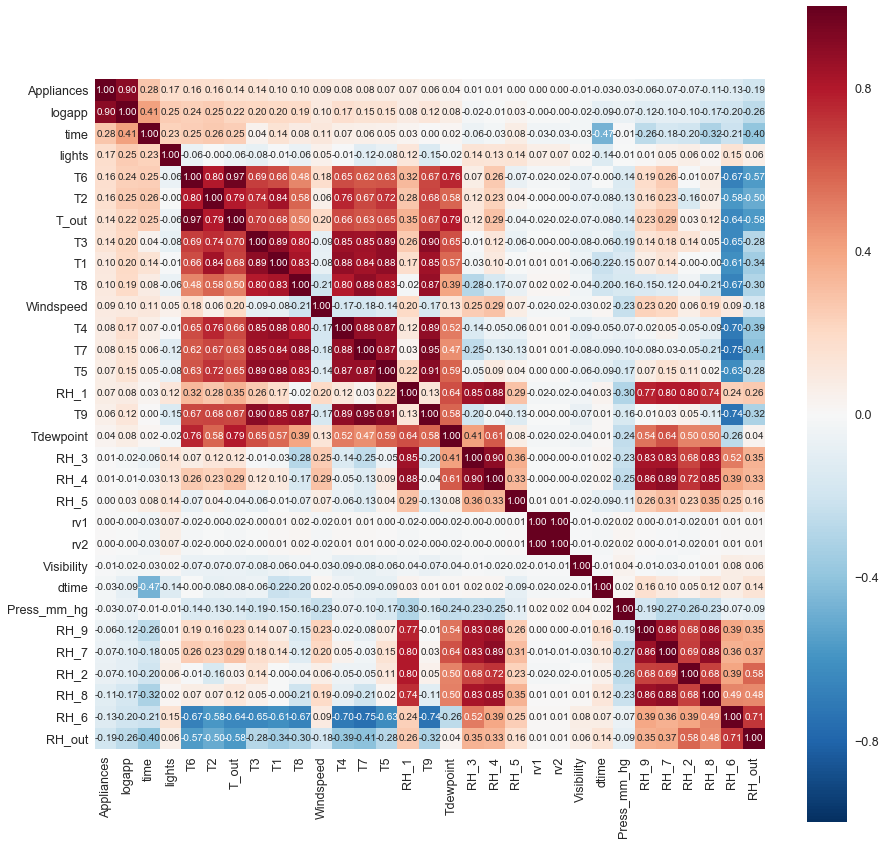

In [69]:
corrmat1 = data.corr()
k=35
cols = corrmat1.nlargest(k,'Appliances')['Appliances'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(15,15))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [46]:
from sklearn.model_selection import train_test_split
X = data.drop(['date','Appliances', 'logapp','rv1','rv2','RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out','T_out','Visibility','Tdewpoint','Windspeed'],axis=1)
y = data['logapp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.63773586077
0.347068328165


In [41]:
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
scores= cross_val_score(GradientBoostingRegressor(),X,y,cv=shuffle,scoring='r2')
print(scores)
print(scores.mean())

[ 0.43142697  0.47256185  0.38995931  0.30728908  0.38570451  0.3394257
  0.38220757  0.45815707  0.27586167  0.3356888 ]
0.377828252863


In [50]:
from sklearn.externals import joblib
joblib.dump(gbr, 'model_final.pkl')

['model_final.pkl']

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor(n_estimators=100)

In [27]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.914197763698
0.383636896598


In [29]:
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
shuffle = cross_validation.KFold(len(X),n_folds=10,shuffle=True)
scores= cross_val_score(RandomForestRegressor(n_estimators=100),X,y,cv=shuffle,scoring='r2')
print(scores)
print(scores.mean())

[ 0.38130179  0.30739837  0.33855256  0.44861411  0.3313264   0.4435367
  0.34349523  0.31082832  0.45692699  0.37988268]
0.374186315182


In [43]:
X.columns

Index(['lights', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9',
       'Press_mm_hg', 'time', 'dtime'],
      dtype='object')